In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

In [4]:
def activation_step(x):
    a = np.ones_like(x)
    a[x <= 0] = 0
    return a

def activation_rectifier(x):
    a = np.copy(x)
    a[x <= 0] = 0
    return a

def activation_softplus(x):
    m1 = x <= -37
    m2 = np.logical_and( x >= -37, x < 18 )
    m3 = np.logical_and( x >= 18, x < 33.3 )
    
    a = np.copy(x)
    a[m1] = np.exp(x[m1])
    a[m2] = np.log1p(np.exp(x[m2]))
    a[m3] += np.exp(-x[m3])
    return a

def activation_rational(x, alpha=1):
    m1 = x < 0
    m2 = x >= 0
    
    a = np.zeros_like(x)
    a[m1] = np.power( 1-x[m1], -alpha )
    a[m2] = np.power( 1+x[m2],  alpha )
    return a

def activation_mixed(x):
    return x/(1-np.exp(-x))

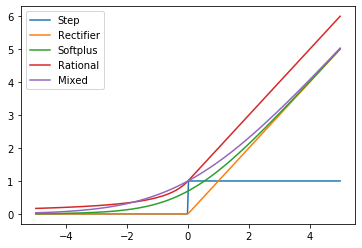

In [5]:
x = np.linspace(-5,5,300)

y1 = activation_step(x)
y2 = activation_rectifier(x)
y3 = activation_softplus(x)
y4 = activation_rational(x)
y5 = activation_mixed(x)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)

plt.gca().legend(['Step','Rectifier','Softplus','Rational','Mixed'])